In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score 
import sklearn.metrics

In [85]:
test = pd.read_csv("test_technidus.csv")
train = pd.read_csv("train_technidus.csv")

In [86]:
train['BirthYear'] = train['BirthDate'].dt.year
test['BirthYear'] = test['BirthDate'].dt.year
train['Age'] = 2019 - train['BirthYear']
test['Age'] = 2019 - test['BirthYear']

In [87]:
pd.isnull(train).any()


CustomerID              False
Title                    True
FirstName               False
MiddleName               True
LastName                False
Suffix                   True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
AveMonthSpend           False
BikeBuyer               False
BirthYear               False
Age                     False
dtype: bool

In [88]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [89]:
for col in ['CountryRegionName', 'Education', 
          'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 
          'BikeBuyer']:
    train=create_dummies(train, col)
    test=create_dummies(test, col)

In [90]:
columns= ['YearlyIncome', 'Age', 
          'CountryRegionName_Australia', 'CountryRegionName_Canada',
          'CountryRegionName_France', 'CountryRegionName_Germany',
          'CountryRegionName_United Kingdom', 'CountryRegionName_United States',
          'Education_Bachelors ', 'Education_Graduate Degree',
          'Education_High School', 'Education_Partial College',
          'Education_Partial High School', 'Occupation_Clerical',
          'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
          'Occupation_Skilled Manual', 'Gender_F', 'Gender_M', 'MaritalStatus_M',
          'NumberCarsOwned', 'MaritalStatus_S', 'HomeOwnerFlag_0', 'HomeOwnerFlag_1',
          'TotalChildren', 'BikeBuyer_0', 'BikeBuyer_1']
print(len(columns))

28


In [91]:
all_X = train[columns]
all_y = train['AveMonthSpend']

In [92]:
train_X, test_X, train_Y, test_Y = train_test_split(all_X, all_y, test_size=0.20,random_state=0)

In [93]:
train[["YearlyIncome", "Age", "AveMonthSpend"]].corr()
## Positive correlation between yealyIncome and AveMonthSpend

,YearlyIncome,Age,AveMonthSpend
YearlyIncome,1.000000,0.186889,0.619057
Age,0.186889,1.000000,0.028765
AveMonthSpend,0.619057,0.028765,1.000000


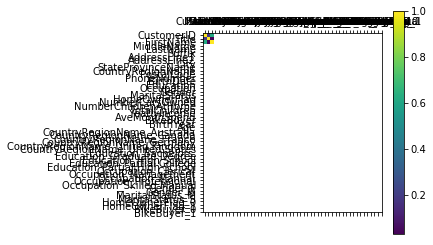

In [94]:
cols=["YearlyIncome", "Age", "AveMonthSpend"]
plt.matshow(train[["YearlyIncome", "Age", "AveMonthSpend"]].corr())
plt.xticks(range(len(train.columns)), train.columns)
plt.yticks(range(len(train.columns)), train.columns)
plt.colorbar()
#corr.style.background_gradient(cmap='coolwarm')
plt.show()

In [95]:
model=LinearRegression()

In [96]:
model.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
model.score(train_X,train_Y)

0.8522814994492804

In [98]:
model.coef_

array([ 3.14336665e-04, -6.55180525e-01, -1.18538639e+00, -5.50873256e-01,
        4.15170315e-01,  1.79005893e+00,  3.04730169e+00, -3.51627128e+00,
        1.57449996e+00, -5.46507499e+00,  1.27916487e+00,  2.26705100e+00,
        3.44359148e-01,  1.93964479e+00, -4.75928480e+00,  3.85558447e+00,
       -6.15160945e-01, -4.20783521e-01, -1.35358204e+01,  1.35358204e+01,
        4.49409357e+00,  1.68289926e+00, -4.49409357e+00, -5.56521723e-01,
        5.56521723e-01,  7.42834209e+00, -3.38524564e+00,  3.38524564e+00])

In [114]:
predictions = model.predict(test_X)
test["AveMonthSpend"]= model.predict(test[columns]).round()
predictions


array([95.32011706, 55.79925733, 68.81794642, ..., 32.67857236,
       38.39770291, 63.97829109])

In [115]:
test_pred=test[["CustomerID","AveMonthSpend"]]
test_pred.to_csv("Pred_spend_linear_reg_ohc_encoding.csv", index=False)

In [101]:
validation.describe()

,CustomerID,YearlyIncome,Age,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Bachelors,...,NumberCarsOwned_4,TotalChildren_0,TotalChildren_1,TotalChildren_2,TotalChildren_3,TotalChildren_4,TotalChildren_5,BikeBuyer_0,BikeBuyer_1,predicted_spend
count,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,...,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000
mean,18879.270411,82330.466362,56.943174,0.206401,0.075767,0.095363,0.099282,0.100588,0.422600,0.317440,...,0.079033,0.232528,0.183540,0.167864,0.131940,0.163292,0.120836,0.494448,0.505552,76.090372
std,4792.188698,40764.741508,10.622767,0.404854,0.264712,0.293811,0.299137,0.300880,0.494134,0.465632,...,0.269879,0.422582,0.387235,0.373868,0.338536,0.369753,0.326043,0.500133,0.500133,27.902190
min,11001.000000,10227.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.871770
25%,14898.000000,50644.500000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.485945
50%,18562.000000,82671.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,74.465732
75%,22515.500000,110639.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,93.705281
max,29465.000000,192484.000000,106.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,155.515917


In [102]:
#from sklearn import metrics 
#0.8495368606428833
metrics.r2_score(test_Y,predictions)

0.8401762247362256

In [104]:
# The mean squared error
# 134.82771622550237
mse= metrics.mean_squared_error(test_Y, predictions)
mse

143.21563878982965

In [105]:
# Explained variance score: 1 is perfect prediction
# 0.8495368606428834
rsc= model.score(test_X, test_Y)
rsc

0.8401762247362256

In [106]:
#Best possible score is 1.0, lower values are worse 
# 0.8495776331507243
variance=metrics.explained_variance_score(test_Y, predictions)
variance

0.8402018917029446

In [107]:
#Mean absolute error regression loss 
# 8.839643298834314
metrics.mean_absolute_error(test_Y, predictions)

9.19852488329554

In [108]:
#Median absolute error regression loss 
# 6.903340066174579
metrics.median_absolute_error(test_Y, predictions)

7.332543360396244